W2/D5 Mini Project

In [2]:
# Importation de la bibliothèque pandas pour la manipulation des données
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/Datasets/US Superstore data.xls')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


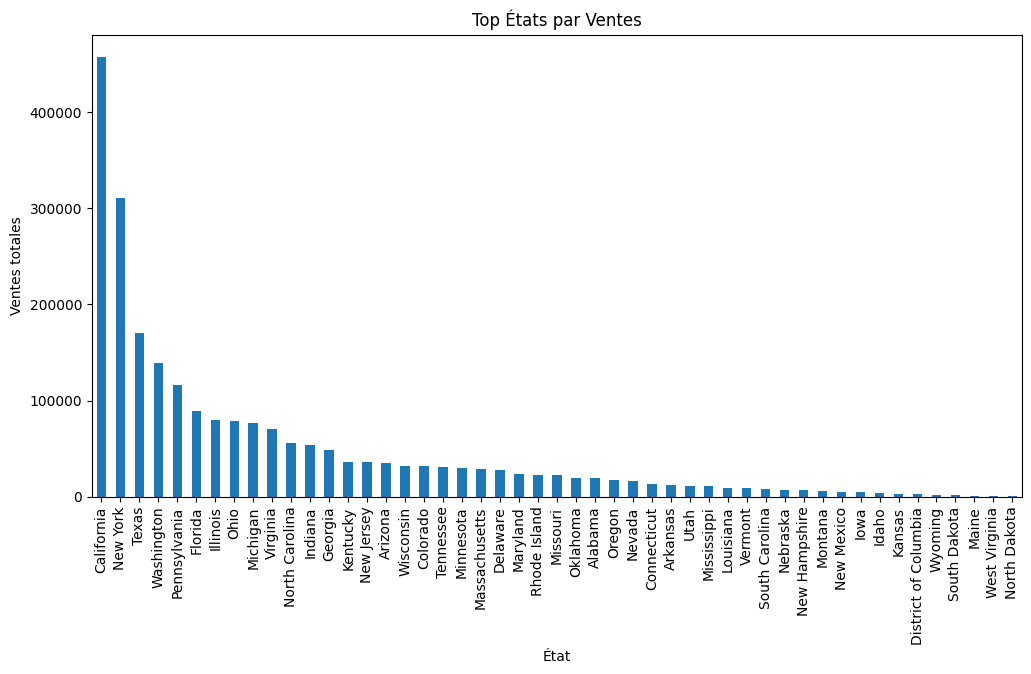

In [3]:
# Quelles sont les états avec le plus de ventes ?
import matplotlib.pyplot as plt

sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sales_by_state.plot(kind='bar')
plt.title('Top États par Ventes')
plt.ylabel('Ventes totales')
plt.xlabel('État')
plt.show()

Californie, New York, Texas et Washington sont les états avec le plus de ventes

In [4]:
# Différences entre New York et Californie en termes de ventes et profits
ny_sales = df[df['State'] == 'New York']['Sales'].sum()
ca_sales = df[df['State'] == 'California']['Sales'].sum()

ny_profit = df[df['State'] == 'New York']['Profit'].sum()
ca_profit = df[df['State'] == 'California']['Profit'].sum()

print(f"Ventes - New York: {ny_sales:.2f}")
print(f"Ventes - California: {ca_sales:.2f}")
print(f"Profit - New York: {ny_profit:.2f}")
print(f"Profit - California: {ca_profit:.2f}")

Ventes - New York: 310876.27
Ventes - California: 457687.63
Profit - New York: 74038.55
Profit - California: 76381.39


Ventes en Californie > Ventes New York et Profit en Californie > Profit New York
---



In [5]:
# Qui est un client exceptionnel à New York ?
ny_customers_profit = df[df['State'] == 'New York'].groupby('Customer Name')['Profit'].sum()
top_ny_customer = ny_customers_profit.idxmax()
top_ny_profit = ny_customers_profit.max()

print(f"Client le plus performant à New York : {top_ny_customer} avec un profit de {top_ny_profit:.2f}")

Client le plus performant à New York : Tom Ashbrook avec un profit de 4599.21


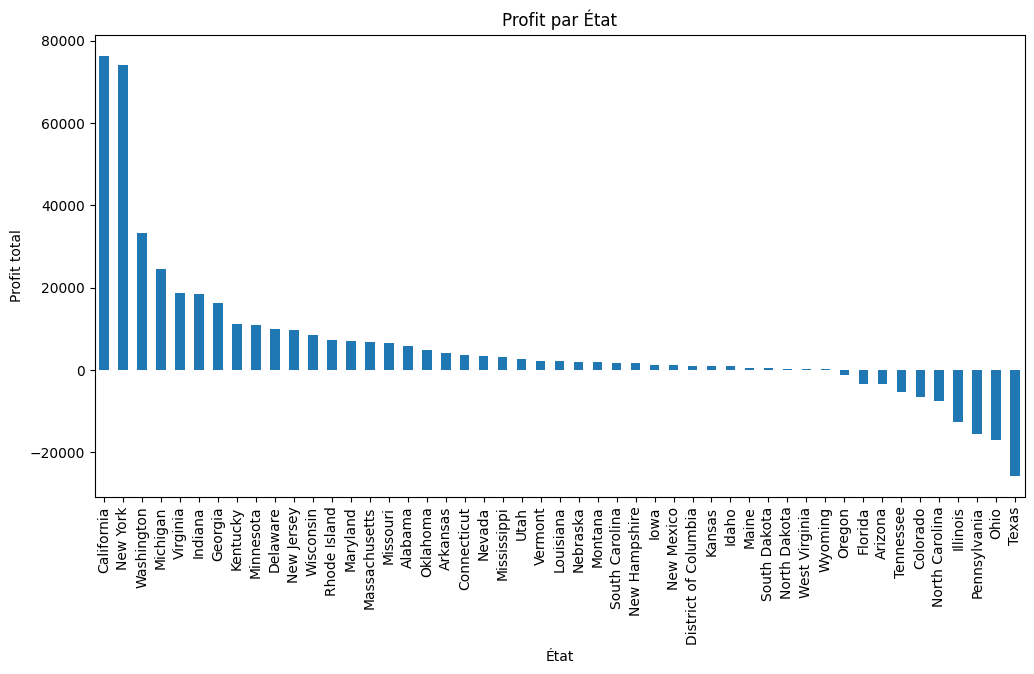

In [6]:
# Y a-t-il des différences dans la rentabilité entre les états ?
profit_by_state = df.groupby('State')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
profit_by_state.plot(kind='bar')
plt.title('Profit par État')
plt.ylabel('Profit total')
plt.xlabel('État')
plt.show()


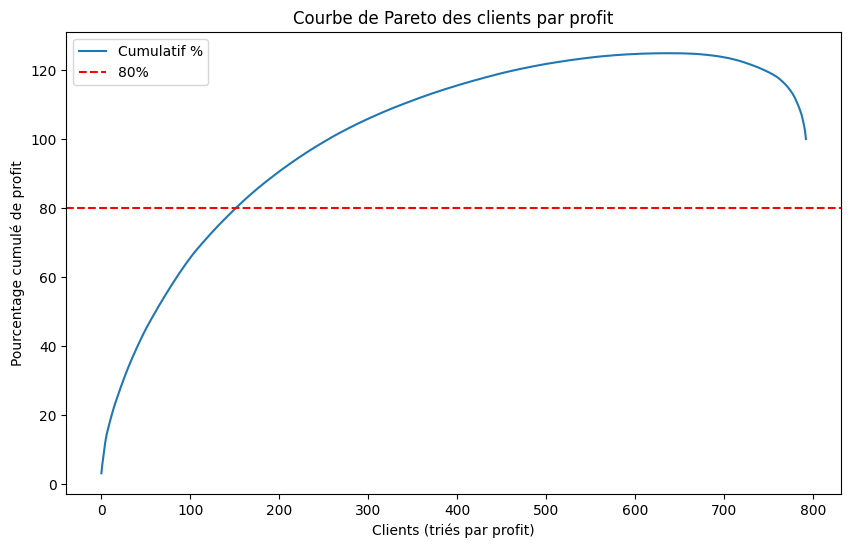

20% des clients contribuent à 81.43% du profit


In [7]:
# Application du principe de Pareto à la profitabilité des clients
# Tri des clients par profit décroissant
clients_profit = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False)

# Calcul du pourcentage cumulatif
cumulative_profit = clients_profit.cumsum()
total_profit = clients_profit.sum()
cumulative_percentage = 100 * cumulative_profit / total_profit

# Trouver le seuil pour 80%
pareto_threshold = cumulative_percentage[cumulative_percentage <= 80].index

# Affichage
plt.figure(figsize=(10,6))
plt.plot(cumulative_percentage.values, label='Cumulatif %')
plt.axhline(80, color='red', linestyle='--', label='80%')
plt.title("Courbe de Pareto des clients par profit")
plt.xlabel('Clients (triés par profit)')
plt.ylabel('Pourcentage cumulé de profit')
plt.legend()
plt.show()

# Résumé
top_20_customers_profit = clients_profit.head(int(0.2 * len(clients_profit)))
print(f"20% des clients contribuent à {100 * top_20_customers_profit.sum() / total_profit:.2f}% du profit")

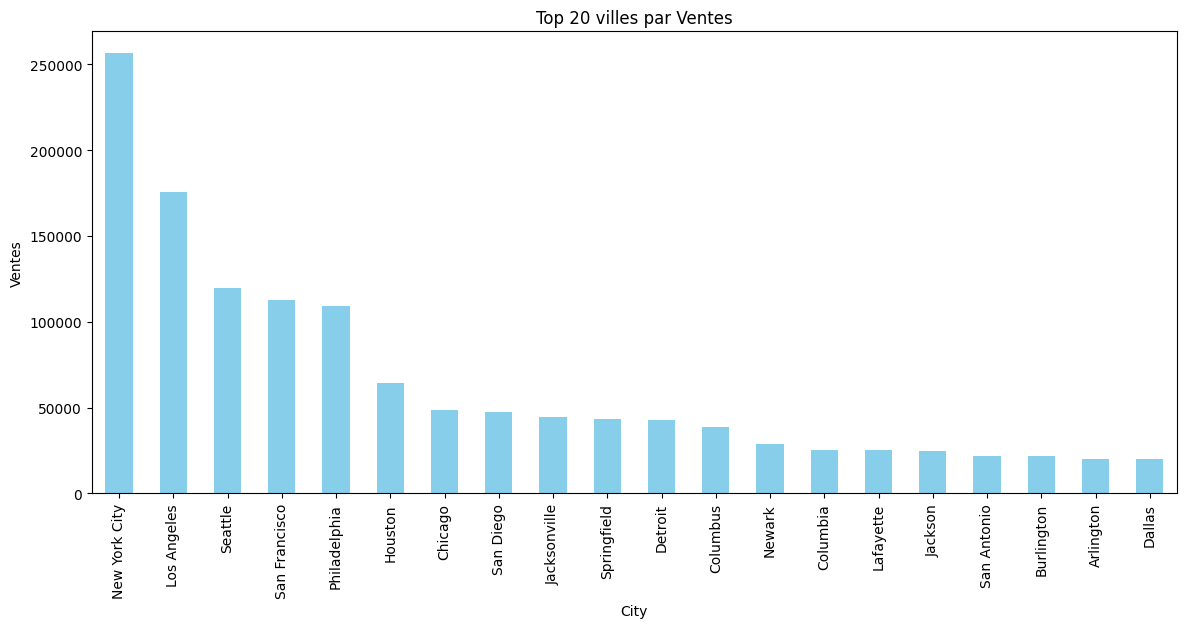

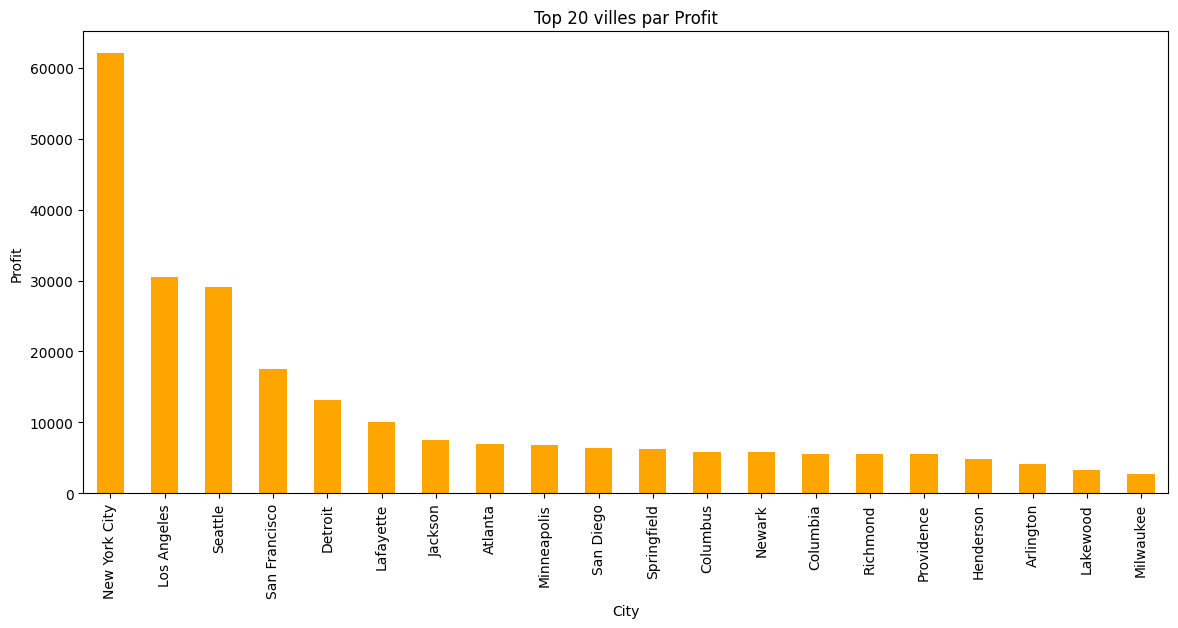

Rapport profit/ventes pour les 20 meilleures villes :
City
Arlington        0.206272
Atlanta               NaN
Burlington            NaN
Chicago               NaN
Columbia         0.221732
Columbus         0.152355
Dallas                NaN
Detroit          0.310547
Henderson             NaN
Houston               NaN
Jackson          0.303706
Jacksonville          NaN
Lafayette        0.400156
Lakewood              NaN
Los Angeles      0.173105
Milwaukee             NaN
Minneapolis           NaN
New York City    0.241984
Newark           0.202748
Philadelphia          NaN
Providence            NaN
Richmond              NaN
San Antonio           NaN
San Diego        0.134197
San Francisco    0.155388
Seattle          0.243901
Springfield      0.144020
dtype: float64


In [8]:
# Top 20 villes par ventes et profits, et analyse des différences
top_cities_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(20)
top_cities_profit = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(20)

# Visualisation
plt.figure(figsize=(14,6))
top_cities_sales.plot(kind='bar', color='skyblue', label='Ventes')
plt.title('Top 20 villes par Ventes')
plt.ylabel('Ventes')
plt.show()

plt.figure(figsize=(14,6))
top_cities_profit.plot(kind='bar', color='orange', label='Profit')
plt.title('Top 20 villes par Profit')
plt.ylabel('Profit')
plt.show()

# Analyse
cities_profit_ratio = top_cities_profit / top_cities_sales
print("Rapport profit/ventes pour les 20 meilleures villes :")
print(cities_profit_ratio)

La présence des Nan signifie que des données sont manquantes dans profit ou vente. Ci-dessous une méthode pour remplacer NaN par des valeurs cohérentes :
calculez la moyenne ou la médiane des ratios existants (non NaN). La médiane est souvent préférable pour éviter que des valeurs extrêmes n'influencent trop le résultat.

In [9]:
import pandas as pd

# Données initiales
data = {
    'City': ['Arlington', 'Atlanta', 'Burlington', 'Chicago', 'Columbia', 'Columbus', 'Dallas', 'Detroit', 'Henderson', 'Houston',
             'Jackson', 'Jacksonville', 'Lafayette', 'Lakewood', 'Los Angeles', 'Milwaukee', 'Minneapolis', 'New York City', 'Newark', 'Philadelphia',
             'Providence', 'Richmond', 'San Antonio', 'San Diego', 'San Francisco', 'Seattle', 'Springfield'],
    'Ratio': [0.206272, None, None, None, 0.221732, 0.152355, None, 0.310547, None, None,
              0.303706, None, 0.400156, None, 0.173105, None, None, 0.241984, 0.202748, None,
              None, None, None, 0.134197, 0.155388, 0.243901, 0.144020]
}

df_cities = pd.DataFrame(data)

# Calcul de la médiane des ratios existants
median_ratio = df_cities['Ratio'].median()

# Imputation des NaN par la médiane
df_cities['Ratio_imputed'] = df_cities['Ratio'].fillna(median_ratio)

# Affichage
print(df_cities[['City', 'Ratio', 'Ratio_imputed']])


             City     Ratio  Ratio_imputed
0       Arlington  0.206272       0.206272
1         Atlanta       NaN       0.206272
2      Burlington       NaN       0.206272
3         Chicago       NaN       0.206272
4        Columbia  0.221732       0.221732
5        Columbus  0.152355       0.152355
6          Dallas       NaN       0.206272
7         Detroit  0.310547       0.310547
8       Henderson       NaN       0.206272
9         Houston       NaN       0.206272
10        Jackson  0.303706       0.303706
11   Jacksonville       NaN       0.206272
12      Lafayette  0.400156       0.400156
13       Lakewood       NaN       0.206272
14    Los Angeles  0.173105       0.173105
15      Milwaukee       NaN       0.206272
16    Minneapolis       NaN       0.206272
17  New York City  0.241984       0.241984
18         Newark  0.202748       0.202748
19   Philadelphia       NaN       0.206272
20     Providence       NaN       0.206272
21       Richmond       NaN       0.206272
22    San A

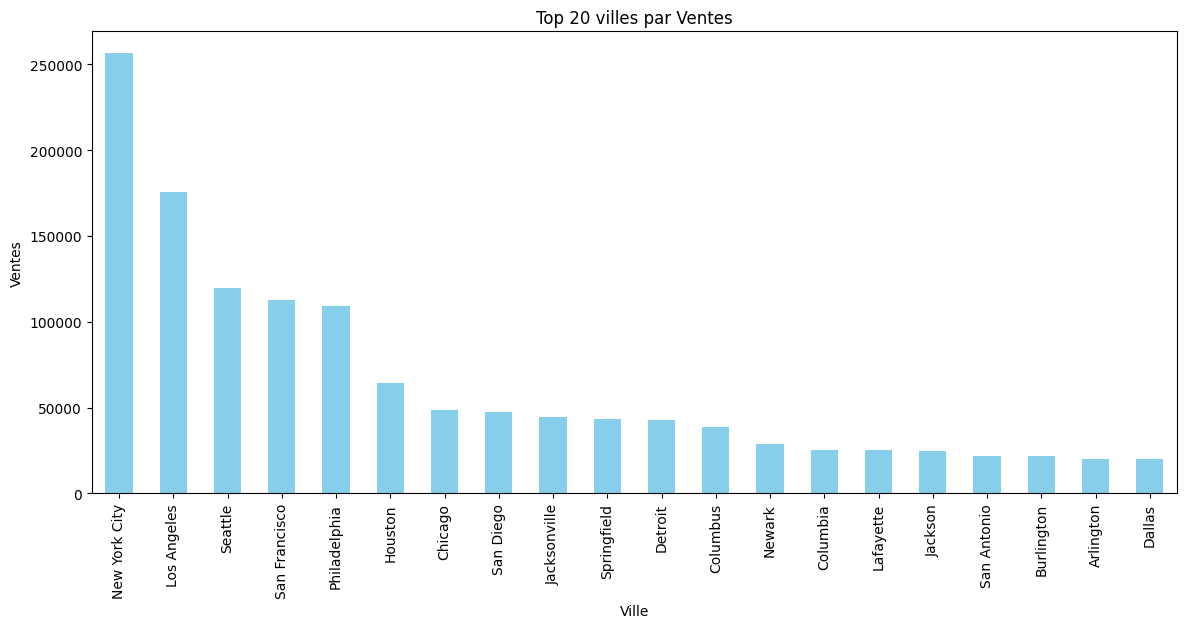

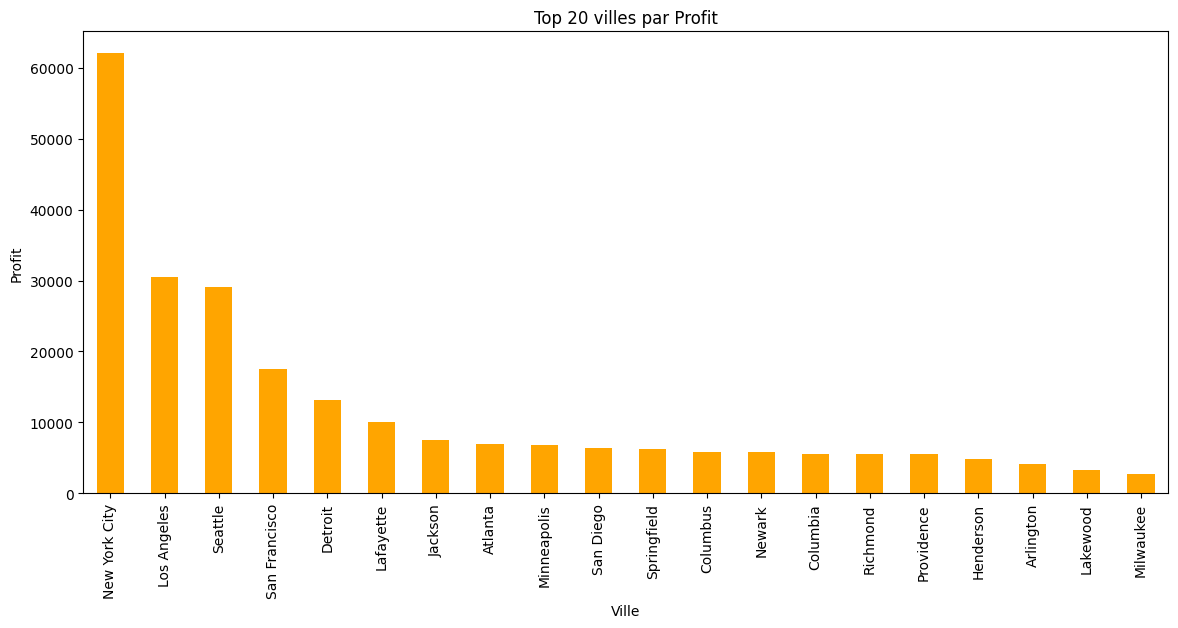

Rapport profit/ventes pour les 20 meilleures villes :
             City     Ratio  Ratio_imputed
0       Arlington  0.206272       0.206272
1         Atlanta       NaN       0.206272
2      Burlington       NaN       0.206272
3         Chicago       NaN       0.206272
4        Columbia  0.221732       0.221732
5        Columbus  0.152355       0.152355
6          Dallas       NaN       0.206272
7         Detroit  0.310547       0.310547
8       Henderson       NaN       0.206272
9         Houston       NaN       0.206272
10        Jackson  0.303706       0.303706
11   Jacksonville       NaN       0.206272
12      Lafayette  0.400156       0.400156
13       Lakewood       NaN       0.206272
14    Los Angeles  0.173105       0.173105
15      Milwaukee       NaN       0.206272
16    Minneapolis       NaN       0.206272
17  New York City  0.241984       0.241984
18         Newark  0.202748       0.202748
19   Philadelphia       NaN       0.206272
20     Providence       NaN       0.206272


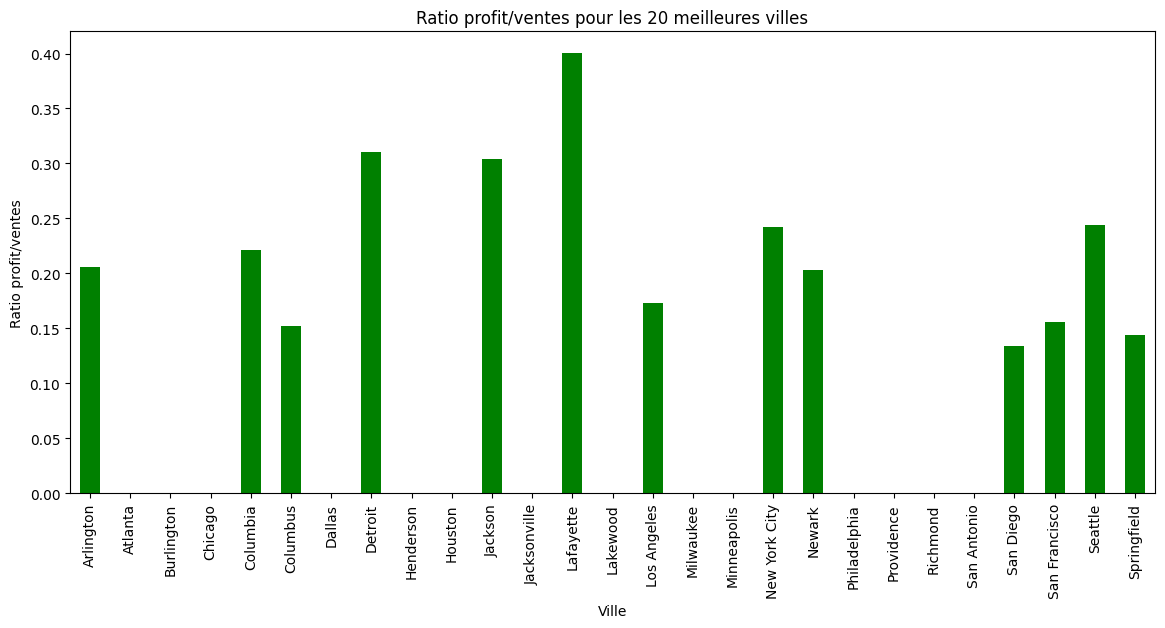

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# construction de df en DataFrame avec la colonne Ratio_imputed
# Données initiales
data = {
    'City': ['Arlington', 'Atlanta', 'Burlington', 'Chicago', 'Columbia', 'Columbus', 'Dallas', 'Detroit', 'Henderson', 'Houston',
             'Jackson', 'Jacksonville', 'Lafayette', 'Lakewood', 'Los Angeles', 'Milwaukee', 'Minneapolis', 'New York City', 'Newark', 'Philadelphia',
             'Providence', 'Richmond', 'San Antonio', 'San Diego', 'San Francisco', 'Seattle', 'Springfield'],
    'Ratio': [0.206272, None, None, None, 0.221732, 0.152355, None, 0.310547, None, None,
              0.303706, None, 0.400156, None, 0.173105, None, None, 0.241984, 0.202748, None,
              None, None, None, 0.134197, 0.155388, 0.243901, 0.144020]
}

df_cities = pd.DataFrame(data)

# Calcul de la médiane des ratios existants
median_ratio = df_cities['Ratio'].median()

# Imputation des NaN par la médiane
df_cities['Ratio_imputed'] = df_cities['Ratio'].fillna(median_ratio)

# 1. Calcul des top 20 villes par ventes et profits
top_cities_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(20)
top_cities_profit = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(20)

# 2. Visualisation des top 20 villes par ventes
plt.figure(figsize=(14,6))
top_cities_sales.plot(kind='bar', color='skyblue')
plt.title('Top 20 villes par Ventes')
plt.ylabel('Ventes')
plt.xlabel('Ville')
plt.show()

# 3. Visualisation des top 20 villes par profits
plt.figure(figsize=(14,6))
top_cities_profit.plot(kind='bar', color='orange')
plt.title('Top 20 villes par Profit')
plt.ylabel('Profit')
plt.xlabel('Ville')
plt.show()

# 4. Analyse du ratio profit/ventes pour ces villes
cities_profit_Ratio_imputed = top_cities_profit / top_cities_sales
print("Rapport profit/ventes pour les 20 meilleures villes :")
print(df_cities[['City', 'Ratio', 'Ratio_imputed']])

# 5. Si vous souhaitez faire une visualisation du ratio profit/ventes
plt.figure(figsize=(14,6))
cities_profit_Ratio_imputed.plot(kind='bar', color='green')
plt.title('Ratio profit/ventes pour les 20 meilleures villes')
plt.ylabel('Ratio profit/ventes')
plt.xlabel('Ville')
plt.show()

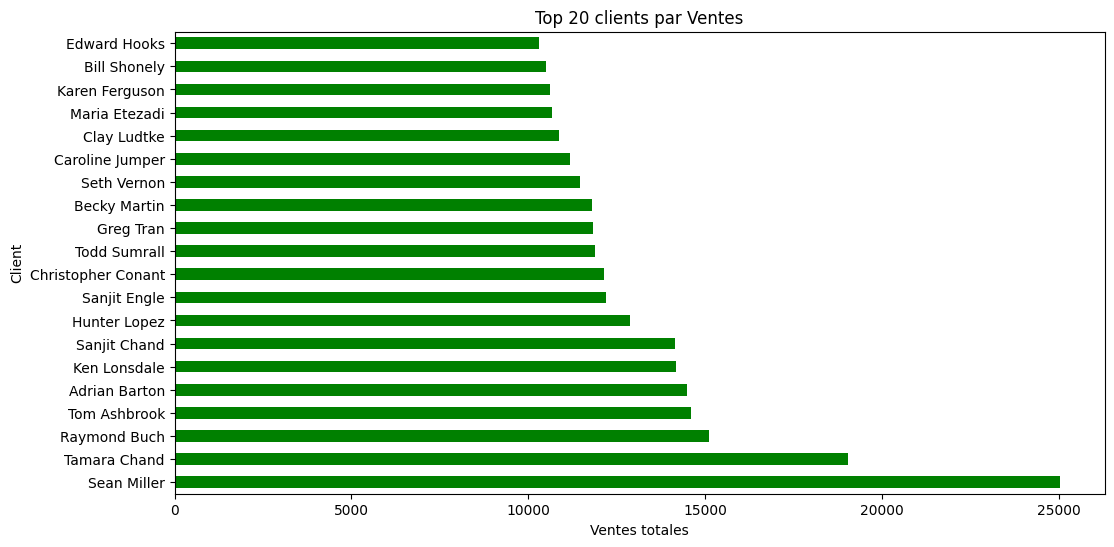

In [11]:
# Top 20 clients par ventes
top_customers_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,6))
top_customers_sales.plot(kind='barh', color='green')
plt.title('Top 20 clients par Ventes')
plt.xlabel('Ventes totales')
plt.ylabel('Client')
plt.show()

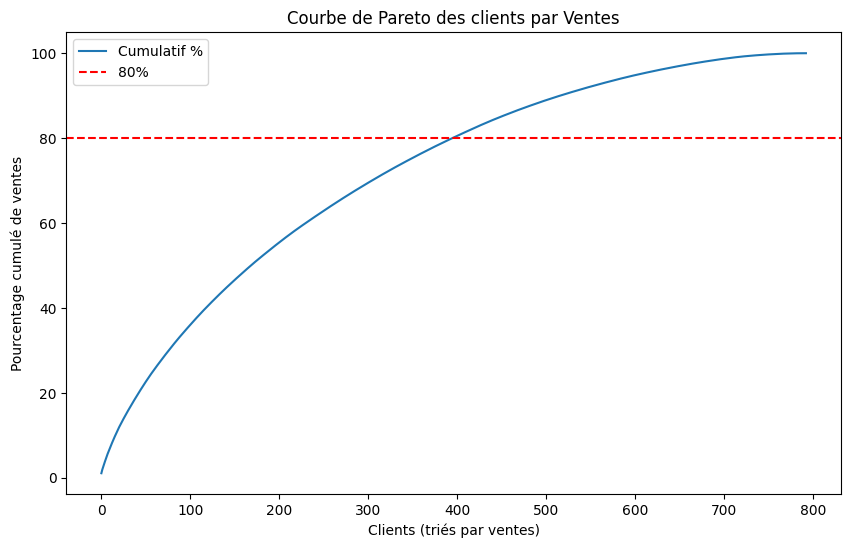

20% des clients contribuent à 47.96% des ventes


In [12]:
# Courbe cumulative des ventes par client (application du principe de Pareto)
# Tri des clients par ventes
clients_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

# Calcul du pourcentage cumulatif
cumulative_sales = clients_sales.cumsum()
total_sales = clients_sales.sum()
cumulative_percentage_sales = 100 * cumulative_sales / total_sales

# Plot
plt.figure(figsize=(10,6))
plt.plot(cumulative_percentage_sales.values, label='Cumulatif %')
plt.axhline(80, color='red', linestyle='--', label='80%')
plt.title("Courbe de Pareto des clients par Ventes")
plt.xlabel('Clients (triés par ventes)')
plt.ylabel('Pourcentage cumulé de ventes')
plt.legend()
plt.show()

# Vérification
top_20_percent_customers = clients_sales.head(int(0.2 * len(clients_sales)))
print(f"20% des clients contribuent à {100 * top_20_percent_customers.sum() / total_sales:.2f}% des ventes")

In [ ]:
États à prioriser : ceux avec le plus grand volume de ventes et de profit.
Villes à cibler : celles qui génèrent une forte rentabilité.
Clients clés : les top 20 clients contribuant à la majorité des profits ou ventes.
Stratégie : concentrer les efforts sur ces zones et clients pour maximiser le retour sur investissement.

Recommandations pour la priorisation marketing :
1. États à prioriser : ceux avec le plus grand volume de ventes et de profit.
2. Villes à cibler : celles qui génèrent une forte rentabilité.
3. Clients clés : les top 20 clients contribuant à la majorité des profits ou ventes.
4. Stratégie : concentrer les efforts sur ces zones et clients pour maximiser le retour sur investissement.